# Random Signals #

This notebook demonstrates different random processes and their properties.
- Uniform distribution
- Gaussian distribution


In [20]:
from __future__ import print_function, division
import os, sys
import time

module_path = os.path.abspath(os.path.join('..')) # append directory one level up to import path
if module_path not in sys.path:  # ... if it hasn't been appended already
    sys.path.append(module_path)

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline

import dsp_fpga_lib as dsp # import and set plot properties
import dsp_fpga_fix_lib as fx

import numpy as np
from numpy import sin, cos, tan, angle, pi, array, arange, log10, zeros, \
  linspace, ones, sqrt
from scipy.stats import norm
import scipy.signal as sig

plt.rcParams["figure.figsize"] = [15, 10]

## Random sequences ##
In Python, we can easily generate random sequences with different properties. Sequences with a **Gaussian** distribution of values are probably best known, but **Uniform** or **Binomial** distributions are also very common.

In [61]:
N = 10000       # number of data points
N_bins = 50     # number of bins for histograms
n = arange(N)   # array 0 ... N
t = n / N       # arr ay 0 ... 1
db_bottom = -60 # display minimum for plotting in dB
f_S = 1         # sampling frequency; bandwidth is f_S / 2 by default
# Gaussian distribution with variance sigma and mean mu
sigma = 2; mu_n = 0 
x_norm = np.random.randn(N) * sigma + mu_n
x_norm_filt = sig.lfilter(np.ones(50)/50, 1, x_norm)
x_sigma = np.arange(-3 * sigma, 3 * sigma, 0.001)
y_sigma = norm.pdf(x_sigma, mu_n, sigma)# Ideal Gaussian bell curve
# Uniform distribution in the range 0 ... Delta with mean mu 
Delta = 2; mu_u = -Delta/2. # range and mean
x_uniform = np.random.rand(N) * Delta + mu_u
# Binomial distribution for n_T trials and a success probability p for each trial
n_T = 1; p = 0.1
x_binom = np.random.binomial(n_T, p, N)

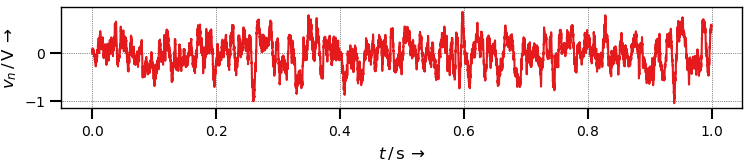

In [67]:
# Make a nice plot of a random signal - select the type in the next line:
x_rnd = x_norm_filt
fig1 = plt.figure(1, figsize=(8,2))
ax1 = fig1.add_subplot(111)
ax1.plot(t, x_rnd, label = r'$\sigma = {0}, m = 0$'.format(sigma))
ax1.set_xlabel(r'$t \,/ \, \mathrm{s}\, \rightarrow$')
ax1.set_ylabel(r'$v_n \,/ \,\mathrm{V} \,\rightarrow$');
fig1.tight_layout()
# fig1.savefig("random.svg", transparent=True, pad_inches=0) # optional, save to file
plt.show()

Zunächst schauen wir uns zwei verschiedene Verteilungsdichtefunktionen an, normal- oder gaussverteilte Folgen und gleichverteilte Folgen.

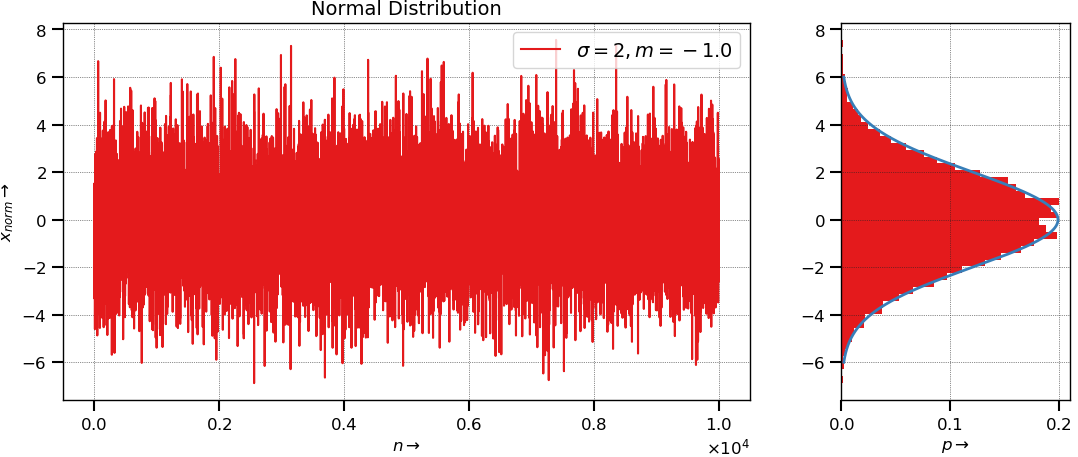

In [4]:
# generate a nice plot
fig2 = plt.figure(2, figsize=(13,5))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
ax13 = plt.subplot(gs[0])
ax13.set_title('Normal Distribution')
ax13.plot(n, x_rnd, label = r'$\sigma = {0}, \mu = {1}$'.format(sigma, mu))
ax13.legend(fontsize = 14)
ax13.set_xlabel(r'$n \rightarrow$');
ax13.set_ylabel(r'$x_{norm}\rightarrow$')
ax14= plt.subplot(gs[1])
ax14.hist(x_norm, bins=N_bins, range=None, density=True, 
          align=u'mid', orientation=u'horizontal', label=None)
ax14.plot(y_sigma, x_sigma, lw=2)
ax14.set_xlabel(r'$p \rightarrow$')
ax14.set_ylim(ax13.get_ylim())
fig2.savefig("gauss.svg")

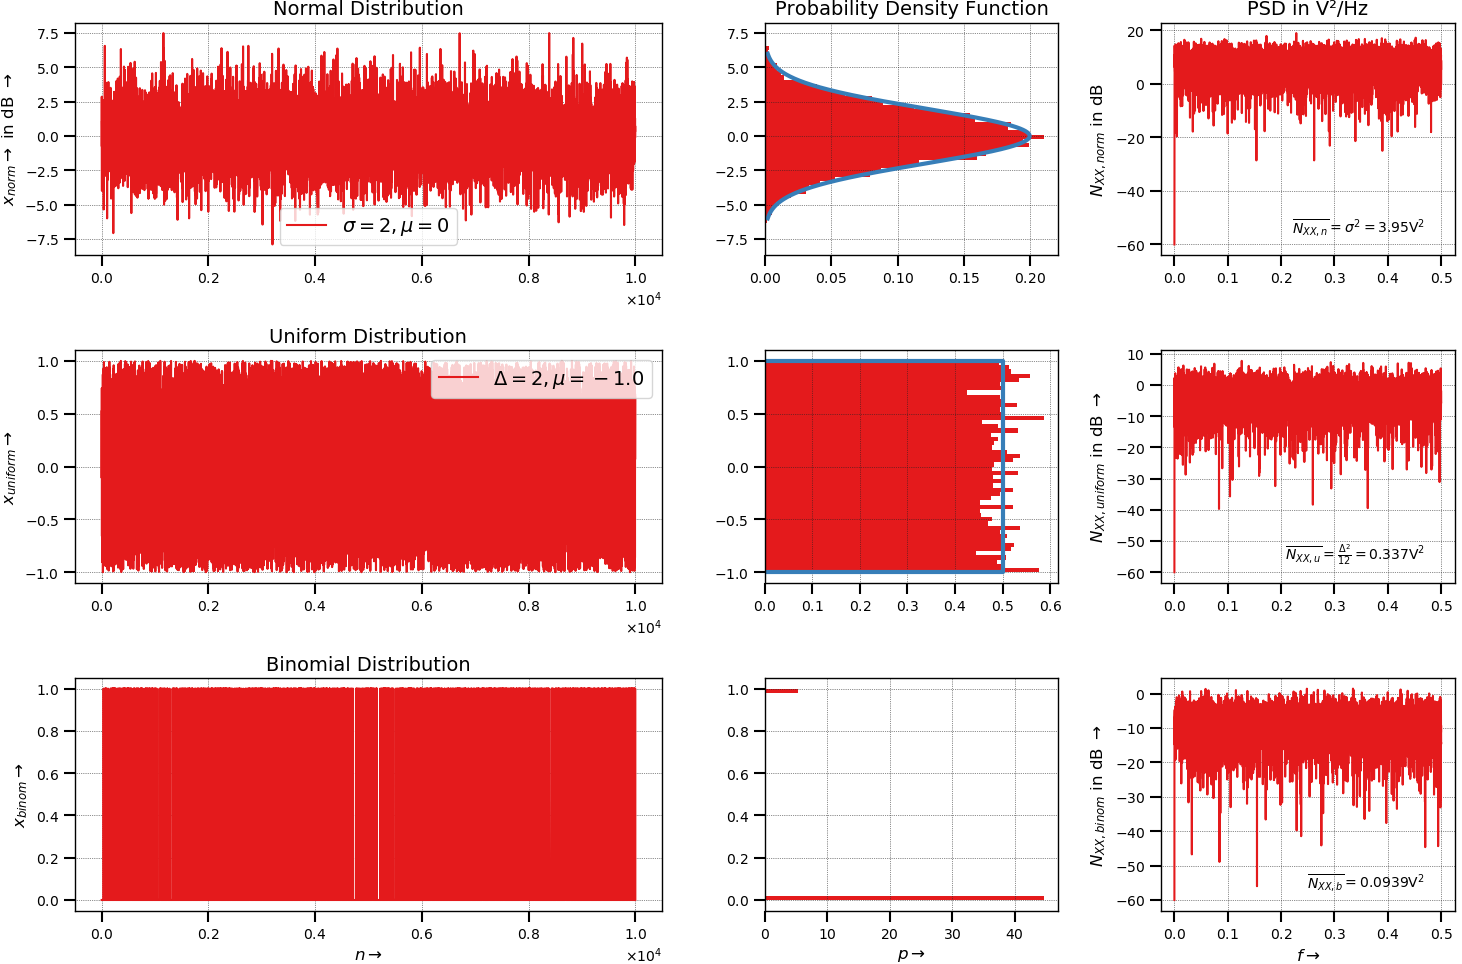

In [66]:
fig3 = plt.figure(3)
gs = gridspec.GridSpec(3, 3, width_ratios=[2, 1, 1])
ax1a = plt.subplot(gs[0])
ax1a.set_title('Normal Distribution')
ax1a.plot(n, x_norm, label = r'$\sigma = {0}, \mu = {1}$'.format(sigma, mu_n))
ax1a.legend(fontsize = 14)
ax1a.set_ylabel(r'$x_{norm}\rightarrow$ in dB $\rightarrow$')
ax1b = plt.subplot(gs[1])
ax1b.set_title('Probability Density Function')
ax1b.hist(x_norm, bins=N_bins, range=None, density=True, 
          align=u'mid', orientation=u'horizontal', label=None)
ax1b.plot(y_sigma, x_sigma, lw=3)
ax1b.set_ylim(ax1a.get_ylim())
ax1c = plt.subplot(gs[2])
ax1c.set_title('PSD in V²/Hz')
f, Nxx_n = sig.periodogram(x_norm, f_S)
ax1c.plot(f, np.clip(10*log10(Nxx_n), db_bottom, np.inf))
ax1c.annotate(r'$\overline{{N_{{XX,n}}}}=\sigma^2={0:.3g}\mathrm{{V}}^2$'.format(np.mean(Nxx_n)*f_S/2), xy=(0.9, 0.1), 
              xycoords='axes fraction', ha='right')
ax1c.set_ylabel(r'$N_{XX, norm}$ in dB')

ax2a = plt.subplot(gs[3])
ax2a.set_title('Uniform Distribution')
ax2a.plot(n, x_uniform, label = r'$\Delta = {0}, \mu = {1}$'.format(Delta, mu))
ax2a.legend(fontsize = 14)
ax2a.set_ylabel(r'$x_{uniform} \rightarrow$')
ax2b = plt.subplot(gs[4])
ax2b.hist(x_uniform, bins=N_bins, range=None, density=True, 
          align=u'mid', orientation=u'horizontal', label=None)
ax2b.plot([0, 1/Delta, 1/Delta, 0],[mu_u, mu_u, Delta+mu_u,Delta+mu_u], lw=3)
ax2b.set_ylim(ax2a.get_ylim())
ax2c = plt.subplot(gs[5])
f, Nxx_u = sig.periodogram(x_uniform, f_S)
ax2c.plot(f, np.clip(10*log10(Nxx_u), db_bottom, np.inf))
ax2c.annotate(r'$\overline{{N_{{XX,u}}}}=\frac{{\Delta^2}}{{12}}={0:.3g}\mathrm{{V}}^2$'.
              format(np.mean(Nxx_u)*f_S/2), xy=(0.9, 0.1), xycoords='axes fraction', ha='right')
ax2c.set_ylabel(r'$N_{XX, uniform}$ in dB $\rightarrow$')
#
ax3a = plt.subplot(gs[6])
ax3a.set_title('Binomial Distribution')
ax3a.plot(n, x_binom)
ax3a.set_xlabel(r'$n \rightarrow$')
ax3a.set_ylabel(r'$x_{binom} \rightarrow$')
ax3b = plt.subplot(gs[7])
ax3b.hist(x_binom, bins=N_bins, range=None, density=True, 
          align=u'mid', orientation=u'horizontal', label=None)
ax3b.set_xlabel(r'$p \rightarrow$')
ax3b.set_ylim(ax3a.get_ylim())
ax3c = plt.subplot(gs[8])
f, Nxx_b = sig.periodogram(x_binom, f_S)
ax3c.plot(f, np.clip(10*log10(Nxx_b), db_bottom, np.inf))
ax3c.annotate(r'$\overline{{N_{{XX,b}}}}={0:.3g}\mathrm{{V}}^2$'.format(np.mean(Nxx_b)*f_S/2), xy=(0.9, 0.1), 
              xycoords='axes fraction', ha='right')
ax3c.set_xlabel(r'$f \rightarrow$')
ax3c.set_ylabel(r'$N_{XX, binom}$ in dB $\rightarrow$')
#
#print("PSD mean: N_xx,n = {0:.4g}V^2, N_xx,u = {1:.4g}V^2".format(np.mean(Nxx_n)*f_S/2, np.mean(Nxx_u)*f_S/2))
fig3.tight_layout()
plt.show()

Wenn man die Zufallsprozesse filtert, ändert sich in der Zeitebene wenig und in der Amplitudenverteilung gar nichts. Das Spektrum ist jetzt natürlich nicht mehr weiß:

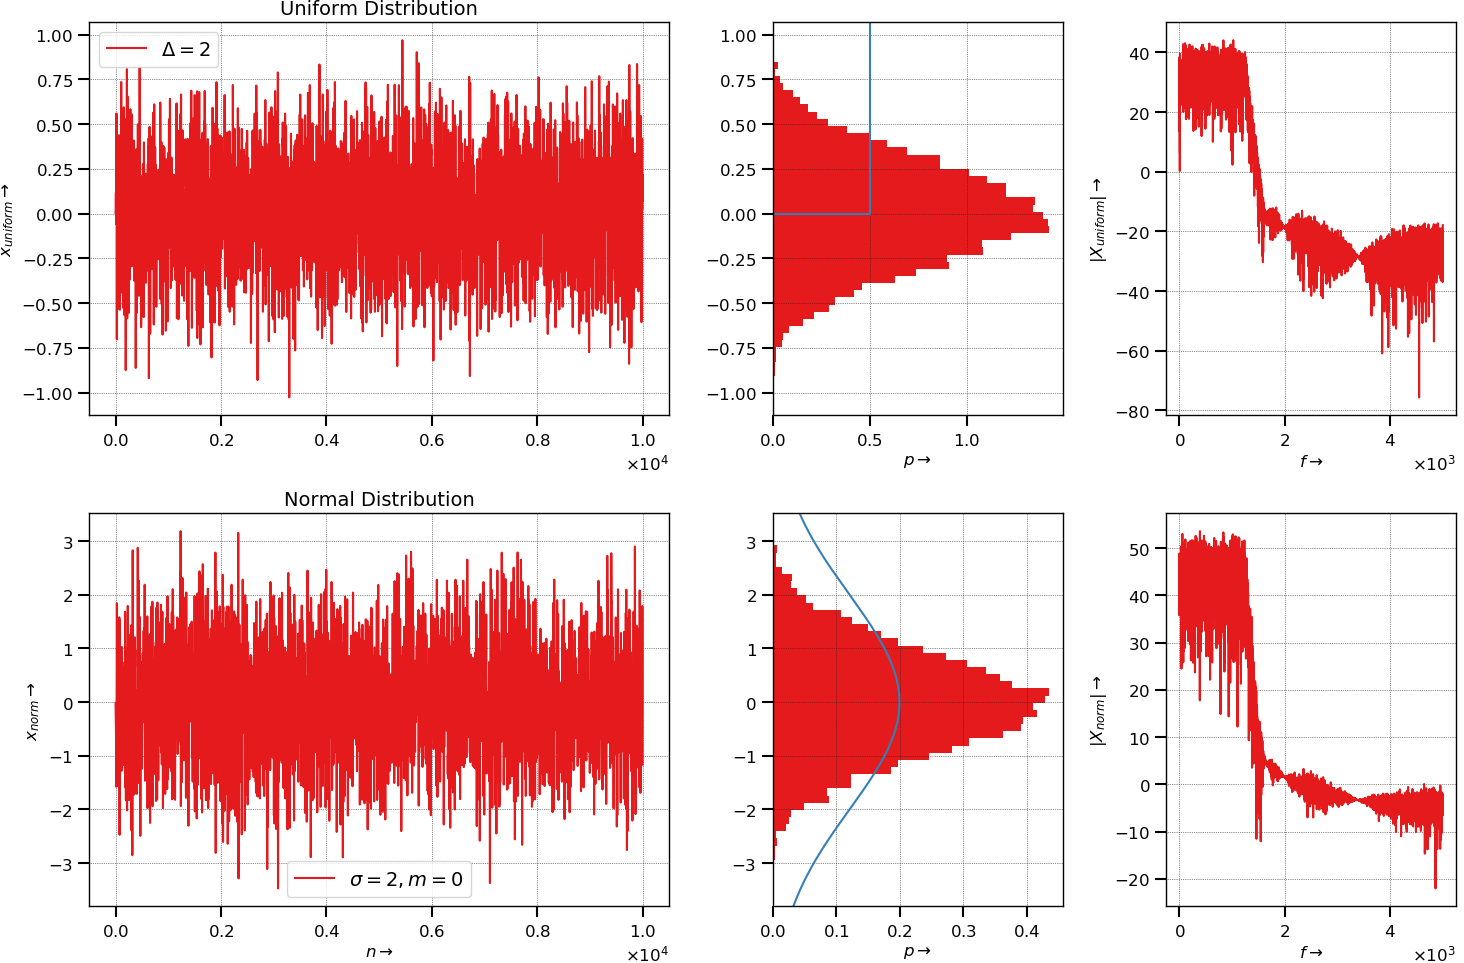

In [6]:
#x_uniform_filt = sig.lfilter(np.ones(50)/50, 1, x_uniform)
b, a = sig.iirfilter(6, [0.25], rs=60, rp=1, btype='lowpass', ftype='ellip') # define filter
x_uniform_filt = sig.lfilter(b, a, x_uniform)
x_norm_filt = sig.lfilter(b, a, x_norm)

fig2 = plt.figure(2)
gs = gridspec.GridSpec(2, 3, width_ratios=[2, 1, 1]) 
ax11 = plt.subplot(gs[0])
ax11.set_title('Uniform Distribution')
ax11.plot(n, x_uniform_filt, label = r'$\Delta = {0}$'.format(Delta))
ax11.legend(fontsize = 14)
#ax11.grid(True)
ax11.set_ylabel(r'$x_{uniform} \rightarrow$')
ax12 = plt.subplot(gs[1])
ax12.hist(x_uniform_filt, bins=N_bins, range=None, density=True, 
          align=u'mid', orientation=u'horizontal', label=None)
ax12.plot([0, 1/Delta, 1/Delta, 0],[0,0,Delta,Delta])
ax12.set_xlabel(r'$p \rightarrow$')
ax12.set_ylim(ax11.get_ylim())
ax13 = plt.subplot(gs[2])
ax13.plot(20*np.log10(np.abs(np.fft.fft(x_uniform_filt)[:N//2])))
ax13.set_xlabel(r'$f \rightarrow$')
ax13.set_ylabel(r'$|X_{uniform}|\rightarrow$')
#
ax14 = plt.subplot(gs[3])
ax14.set_title('Normal Distribution')
ax14.plot(n, x_norm_filt, label = r'$\sigma = {0}, m = 0$'.format(sigma))
ax14.legend(fontsize = 14)
ax14.set_xlabel(r'$n \rightarrow$');
ax14.set_ylabel(r'$x_{norm}\rightarrow$')
ax15= plt.subplot(gs[4])
#ax14.plot(hist)
ax15.hist(x_norm_filt, bins=N_bins, range=None, density=True, 
          align=u'mid', orientation=u'horizontal', label=None)
ax15.plot(y_sigma, x_sigma)
ax15.set_xlabel(r'$p \rightarrow$')
ax15.set_ylim(ax14.get_ylim())
ax16 = plt.subplot(gs[5])
ax16.plot(20*np.log10(np.abs(np.fft.fft(x_norm_filt)[:N//2])))
ax16.set_xlabel(r'$f \rightarrow$')
ax16.set_ylabel(r'$|X_{norm}|\rightarrow$')
#
fig2.tight_layout()
plt.show()

<hr>
**Copyright**

(c) 2016 - 2018 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp_fpga "Digitale Signalverarbeitung auf FPGAs"

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing auf FPGAs - Vorlesungsunterlagen mit Simulationsbeispielen, 2018*.